In [90]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [91]:
# Lire les données (Le dataset récupéré à partir du site "https://www.basketball-reference.com/playoffs/NBA_2023_games.html)
df = pd.read_csv('/content/drive/MyDrive/sportsref_download - sportsref_download.xls.csv')
df.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Arena,Notes
0,"Sat, Apr 15, 2023",1:00p,Brooklyn Nets,101.0,Philadelphia 76ers,121.0,Box Score,NaN,"20,913",Wells Fargo Center,NaN
1,"Sat, Apr 15, 2023",3:30p,Atlanta Hawks,99.0,Boston Celtics,112.0,Box Score,NaN,"19,156",TD Garden,NaN
2,"Sat, Apr 15, 2023",6:00p,New York Knicks,101.0,Cleveland Cavaliers,97.0,Box Score,NaN,"19,432",Rocket Mortgage Fieldhouse,NaN
3,"Sat, Apr 15, 2023",8:30p,Golden State Warriors,123.0,Sacramento Kings,126.0,Box Score,NaN,"18,253",Golden 1 Center,NaN
4,"Sun, Apr 16, 2023",3:00p,Los Angeles Lakers,128.0,Memphis Grizzlies,112.0,Box Score,NaN,"18,487",FedEx Forum,NaN


Les attributs présents dans le dataset sont les suivants :
1.   Date : La date à laquelle le match a été joué.
1.   Start (ET) : L'heure de début du match (heure de l'Est).
1.   Visitor/Neutral : L'équipe visiteuse ou neutre (équipe qui joue à l'extérieur ou dans une arène neutre).
1.   PTS1 : Le nombre de points marqués par l'équipe visiteuse ou neutre.
1.   Home/Neutral : L'équipe à domicile ou neutre (équipe qui joue à domicile ou dans une arène neutre).
1.   PTS2 : Le nombre de points marqués par l'équipe à domicile ou neutre.
1.   Attend. : L'affluence du public lors du match (nombre de spectateurs présents).
1.   Arena : Le nom de l'arène où le match a été joué.
1.   Notes : Des notes ou informations supplémentaires sur le match.




In [92]:
"Le nombre de lignes dans l'ennsemblre de données : ", len(df)

("Le nombre de lignes dans l'ennsemblre de données : ", 82)

# ***Pré-traitement de données***

In [93]:
# Supprimer les colones  'Unnamed: 6', 'Unnamed: 7','Start (ET)', 'Attend.', 'Arena', 'Notes'
df = df.drop(columns=['Unnamed: 6', 'Unnamed: 7','Start (ET)', 'Attend.', 'Arena', 'Notes'])
df.columns

Index(['Date', 'Visitor/Neutral', 'PTS', 'Home/Neutral', 'PTS.1'], dtype='object')

In [94]:
# Remplacer les colonnes PTS et PTS.1 par une colonne de resultat (1 si l'équipe visiteuse gagne sinon 0)
df['result'] = (df['PTS'] > df['PTS.1']).replace({True: 1, False: 0})

In [95]:
df = df.drop(columns=['PTS', 'PTS.1'])

In [96]:
# Extraire le jour du mois
df['day'] = pd.to_datetime(df["Date"]).dt.day

In [97]:
# Extraire le ième jour de la semaine
day_of_week = {
'Monday' : 1,
'Tuesday' : 2,
'Wednesday': 3,
'Thursday': 4,
'Friday': 5,
'Saturday': 6,
'Sunday':7,
}
df['day_name'] = pd.to_datetime(df["Date"]).dt.day_name().apply(lambda x : day_of_week[x])

In [98]:
df = df.drop(columns=['Date'])

In [99]:
# Supprimer les lignes où il n'y a rien comme information (None)
df = df.dropna()

In [100]:
len(df)

82

In [101]:
df.head(10)

,Visitor/Neutral,Home/Neutral,result,day,day_name
0,Brooklyn Nets,Philadelphia 76ers,0,15,6
1,Atlanta Hawks,Boston Celtics,0,15,6
2,New York Knicks,Cleveland Cavaliers,1,15,6
3,Golden State Warriors,Sacramento Kings,0,15,6
4,Los Angeles Lakers,Memphis Grizzlies,1,16,7
5,Miami Heat,Milwaukee Bucks,1,16,7
6,Los Angeles Clippers,Phoenix Suns,1,16,7
7,Minnesota Timberwolves,Denver Nuggets,0,16,7
8,Brooklyn Nets,Philadelphia 76ers,0,17,1
9,Golden State Warriors,Sacramento Kings,0,17,1


In [102]:
# Encodage des chaînes de caractères en nombres entiers
clubs ={ club:id for id,club in enumerate(set(list(df['Visitor/Neutral']) + list(df['Home/Neutral'])) )}
df['Visitor/Neutral'] = df['Visitor/Neutral'].apply(lambda x: clubs[x])
df['Home/Neutral'] = df['Home/Neutral'].apply(lambda x: clubs[x])

In [103]:
df

,Visitor/Neutral,Home/Neutral,result,day,day_name
0,7,10,0,15,6
1,9,1,0,15,6
2,2,14,1,15,6
3,8,4,0,15,6
4,6,11,1,16,7
...,...,...,...,...,...
77,3,1,0,25,4
78,5,6,0,26,5
79,1,3,0,27,6
80,6,5,0,28,7


## ***Normalization de données***

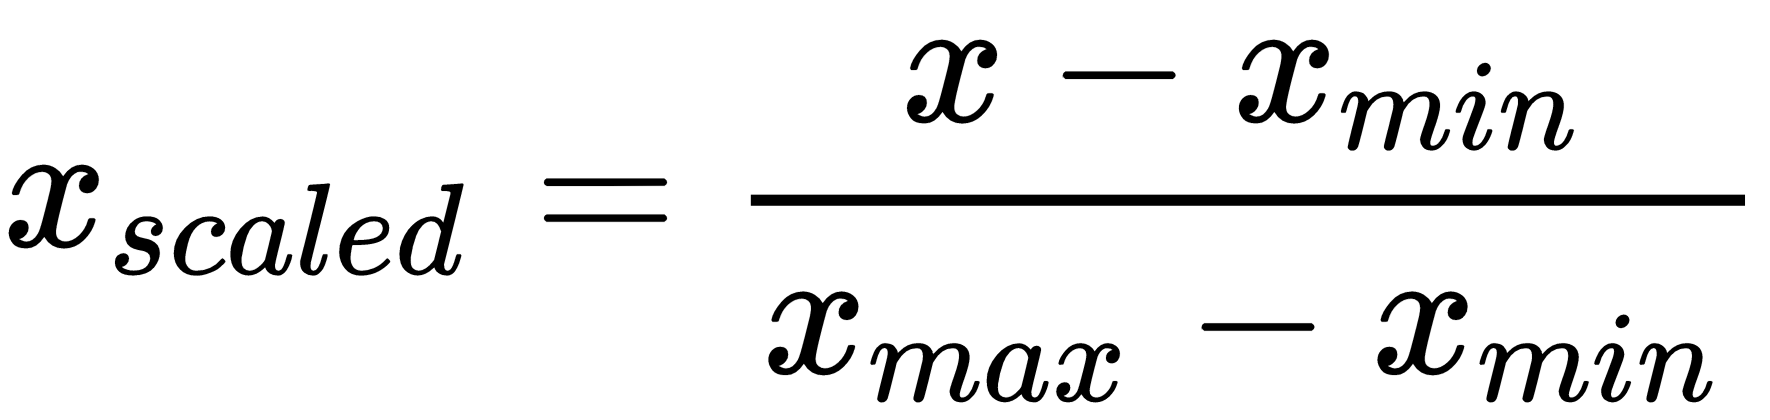

In [104]:
def normalization_minmax(x,min,max):
  return (float(x)-float(min))/(float(max)-float(min))

In [105]:
min_max_dict = {}
for key in set(df.columns) - {'result'}:
  min  = df[key].min()
  max = df[key].max()
  min_max_dict[key] = {
      'min': min,
      'max':max,
  }
  df[key] = df[key].apply(lambda x: normalization_minmax(x,df[key].min(), df[key].max()))

In [106]:
df

,Visitor/Neutral,Home/Neutral,result,day,day_name
0,0.466667,0.666667,0,0.482759,0.833333
1,0.600000,0.066667,0,0.482759,0.833333
2,0.133333,0.933333,1,0.482759,0.833333
3,0.533333,0.266667,0,0.482759,0.833333
4,0.400000,0.733333,1,0.517241,1.000000
...,...,...,...,...,...
77,0.200000,0.066667,0,0.827586,0.500000
78,0.333333,0.400000,0,0.862069,0.666667
79,0.066667,0.200000,0,0.896552,0.833333
80,0.400000,0.333333,0,0.931034,1.000000


## ***codage et normalization des données de la final***

In [107]:
#statistics 

final = {
    'Eastern'	: ( 
        normalization_minmax(clubs['Boston Celtics'],**min_max_dict['Visitor/Neutral']) , 
        normalization_minmax(clubs['Miami Heat'],**min_max_dict['Home/Neutral']) 
    ),
    'Western'  : (
        normalization_minmax(clubs['Denver Nuggets'],**min_max_dict['Visitor/Neutral']) , 
        normalization_minmax(clubs['Los Angeles Lakers'],**min_max_dict['Home/Neutral']) 
    )
}
final

{'Eastern': (0.06666666666666667, 0.2), 'Western': (0.3333333333333333, 0.4)}

 Il est important de noter que la finale se déroulera sur une série de sept matchs.

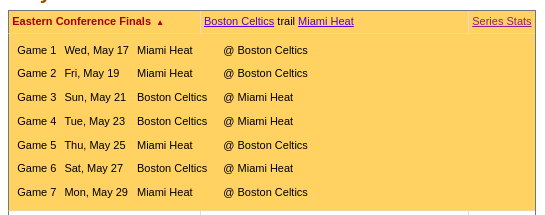

In [108]:
games_eastern =  {
    #           (day_name, day, equipe1, equipe 2)
    'Game 1'	: (3,  17,	'Miami Heat',	'Boston Celtics'),  # Wednesday
    'Game 2'	: (5,  19,	'Miami Heat',	'Boston Celtics'),  # Friday
    'Game 3'	: (7, 21,	'Boston Celtics', 'Miami Heat'),    # Sunday
    'Game 4'	: (2, 23,	'Boston Celtics', 'Miami Heat'),    # Tuesday
    'Game 5'	: (4, 25,	'Miami Heat', 'Boston Celtics'),    # Thursday
    'Game 6'	: (6, 27,	'Boston Celtics', 'Miami Heat'),    # Saturday
    'Game 7'	: (1, 29,	'Miami Heat', 'Boston Celtics'),    # Monday
}


games_eastern_coded = {}

for game in games_eastern:
  day_name, day,	Visitor_Neutral,	Home_Neutral= games_eastern[game]
  games_eastern_coded[game] = (
      normalization_minmax(day_name,**min_max_dict['day_name']),
      normalization_minmax(day,**min_max_dict['day']),
      normalization_minmax(clubs[Visitor_Neutral],**min_max_dict['Visitor/Neutral']),
      normalization_minmax(clubs[Home_Neutral],**min_max_dict['Home/Neutral']),
)
games_eastern_coded

{'Game 1': (0.3333333333333333, 0.5517241379310345, 0.2, 0.06666666666666667),
 'Game 2': (0.6666666666666666, 0.6206896551724138, 0.2, 0.06666666666666667),
 'Game 3': (1.0, 0.6896551724137931, 0.06666666666666667, 0.2),
 'Game 4': (0.16666666666666666, 0.7586206896551724, 0.06666666666666667, 0.2),
 'Game 5': (0.5, 0.8275862068965517, 0.2, 0.06666666666666667),
 'Game 6': (0.8333333333333334, 0.896551724137931, 0.06666666666666667, 0.2),
 'Game 7': (0.0, 0.9655172413793104, 0.2, 0.06666666666666667)}

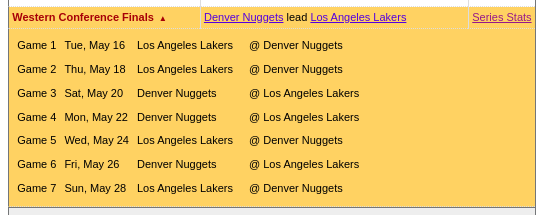

In [109]:
games_western = {
    #           (day_name, day, equipe1, equipe 2)
    'Game 1' :	(2, 16,	'Los Angeles Lakers', 'Denver Nuggets'),  # Tuesday
    'Game 2' :	(4, 18,	'Los Angeles Lakers', 'Denver Nuggets'),  # Thursday
    'Game 3' :	(6, 20,	'Denver Nuggets', 'Los Angeles Lakers'),  # Saturday
    'Game 4' :	(1, 22,	'Denver Nuggets', 'Los Angeles Lakers'),	# Monday
    'Game 5' :	(3, 24,	'Los Angeles Lakers', 'Denver Nuggets'),	# Wednesday
    'Game 6' :	(5, 26,	'Denver Nuggets', 'Los Angeles Lakers'),	# Friday
    'Game 7' :	(7, 28,	'Los Angeles Lakers', 'Denver Nuggets'),  # Sunday
}

games_western_coded = {}

for game in games_western:
  day_name, day, Visitor_Neutral, Home_Neutral= games_western[game]
  games_western_coded[game] = (
      normalization_minmax(day_name,**min_max_dict['day_name']),
      normalization_minmax(day,**min_max_dict['day']),
      normalization_minmax(clubs[Visitor_Neutral],**min_max_dict['Visitor/Neutral']),
      normalization_minmax(clubs[Home_Neutral],**min_max_dict['Home/Neutral']),
  )  
games_western_coded

{'Game 1': (0.16666666666666666, 0.5172413793103449, 0.4, 0.3333333333333333),
 'Game 2': (0.5, 0.5862068965517241, 0.4, 0.3333333333333333),
 'Game 3': (0.8333333333333334, 0.6551724137931034, 0.3333333333333333, 0.4),
 'Game 4': (0.0, 0.7241379310344828, 0.3333333333333333, 0.4),
 'Game 5': (0.3333333333333333, 0.7931034482758621, 0.4, 0.3333333333333333),
 'Game 6': (0.6666666666666666, 0.8620689655172413, 0.3333333333333333, 0.4),
 'Game 7': (1.0, 0.9310344827586207, 0.4, 0.3333333333333333)}

# **Machine learning Method**

## ***Linear Regression***

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [111]:
x = df[[ 'day_name', 'day',	'Visitor/Neutral', 'Home/Neutral']].to_numpy()
y = df[['result']].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [112]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
len(x_train), len(x_test)

(65, 17)

In [24]:
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Root Mean Squared Error: 0.4557172365767785
Mean Absolute Error: 0.38841348182886465
Mean Squared Error: 0.2076781997131755
R-squared score: 0.09062121640745868


Prédiction du vainqueur de la conférence Ouest : Denver Nuggets

In [25]:
# Obtenir des pronostics pour chaque match
result_western = model.predict(np.array(list(list(game) for game in  games_western_coded.values()))) > 0.5

In [26]:
game_result = {}
for i,game in enumerate(games_western) :
  game_result[game] = (
      games_western[game][2],
      games_western[game][3],
       {
          'result' : games_western[game][2] if result_western[i] else games_western[game][3]
      }
  )
game_result

{'Game 1': ('Los Angeles Lakers',
  'Denver Nuggets',
  {'result': 'Denver Nuggets'}),
 'Game 2': ('Los Angeles Lakers',
  'Denver Nuggets',
  {'result': 'Denver Nuggets'}),
 'Game 3': ('Denver Nuggets',
  'Los Angeles Lakers',
  {'result': 'Los Angeles Lakers'}),
 'Game 4': ('Denver Nuggets',
  'Los Angeles Lakers',
  {'result': 'Los Angeles Lakers'}),
 'Game 5': ('Los Angeles Lakers',
  'Denver Nuggets',
  {'result': 'Denver Nuggets'}),
 'Game 6': ('Denver Nuggets',
  'Los Angeles Lakers',
  {'result': 'Los Angeles Lakers'}),
 'Game 7': ('Los Angeles Lakers',
  'Denver Nuggets',
  {'result': 'Denver Nuggets'})}

In [27]:
# Effectuer le décompte du nombre de victoires pour chaque équipe.
vectory_game_count_DenverNuggets = len([game_result[key][2]['result'] for key in game_result  if game_result[key][2]['result']=='Denver Nuggets']) 
vectory_game_count_LosAngelesLakers = len([game_result[key][2]['result'] for key in game_result  if game_result[key][2]['result']=='Los Angeles Lakers'])

In [28]:
vectory_game_count_DenverNuggets, vectory_game_count_LosAngelesLakers

(4, 3)

In [ ]:
"""
Selon les résultats de la regression logistique, Denver Nuggets sera le vainquer de la Conférence Ouest
"""

Prédiction du vainqueur de la conférence Est : Boston Celtics

In [29]:
# Obtenir des pronostics pour chaque match
result_eastern = model.predict(np.array(list(list(games_eastern) for games_eastern in  games_eastern_coded.values()))) > 0.5 

In [30]:
game_eastern_result = {}
for i,game in enumerate(games_eastern) :
  game_eastern_result[game] = (
      games_eastern[game][2],
      games_eastern[game][3],
       {
          'result' : games_eastern[game][2] if result_eastern[i] else games_eastern[game][3]
      }
  )

In [116]:
game_eastern_result

{'Game 1': ('Miami Heat', 'Boston Celtics', {'result': 'Boston Celtics'}),
 'Game 2': ('Miami Heat', 'Boston Celtics', {'result': 'Boston Celtics'}),
 'Game 3': ('Boston Celtics', 'Miami Heat', {'result': 'Miami Heat'}),
 'Game 4': ('Boston Celtics', 'Miami Heat', {'result': 'Miami Heat'}),
 'Game 5': ('Miami Heat', 'Boston Celtics', {'result': 'Boston Celtics'}),
 'Game 6': ('Boston Celtics', 'Miami Heat', {'result': 'Miami Heat'}),
 'Game 7': ('Miami Heat', 'Boston Celtics', {'result': 'Boston Celtics'})}

In [31]:
# Effectuer le décompte du nombre de victoires pour chaque équipe.
vectory_game_count_MiamiHeat = len([game_eastern_result[key][2]['result'] for key in game_eastern_result  if game_eastern_result[key][2]['result']=='Miami Heat'])
vectory_game_count_BostonCeltics = len([game_eastern_result[key][2]['result'] for key in game_eastern_result  if game_eastern_result[key][2]['result']=='Boston Celtics'])
vectory_game_count_MiamiHeat, vectory_game_count_BostonCeltics

(3, 4)

In [ ]:
"""
Selon les résultats de la regression logistique, Boston Celtics sera le vainquer de la Conférence Ouest
"""

Prédiction du champion NBA 2022/2023 en fonction des deux vainqueurs : Denver Nuggets

In [32]:
data_champion = np.array([
        [
          1,
          1,
         normalization_minmax(clubs['Boston Celtics'],**min_max_dict['Visitor/Neutral']),
         normalization_minmax(clubs['Denver Nuggets'],**min_max_dict['Home/Neutral'])
      ],
])

In [33]:
champion_pred =  int((model.predict(data_champion) > 0.5 )[0][0])

In [34]:
champion_pred

0

In [114]:
"""
Selon la regression logistique, Denver Nuggets sera le champion de la NBA 2022/2023
"""

'\nSelon la regression logistique, Denver Nuggets sera le champion de la NBA 2022/2023\n'

# ***Neural Network***

In [35]:
from keras.models import Sequential
from keras.layers import Dense


In [36]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(4,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=200, batch_size=6)

Epoch 1/200
11/11 [==============================] - 2s 4ms/step - loss: 0.6798 - accuracy: 0.7231
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.7231
Epoch 3/200
11/11 [==============================] - 0s 6ms/step - loss: 0.6496 - accuracy: 0.7231
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 0.6375 - accuracy: 0.7231
Epoch 5/200
11/11 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.7231
Epoch 6/200
11/11 [==============================] - 0s 3ms/step - loss: 0.6207 - accuracy: 0.7231
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 0.6126 - accuracy: 0.7231
Epoch 8/200
11/11 [==============================] - 0s 6ms/step - loss: 0.6114 - accuracy: 0.7231
Epoch 9/200
11/11 [==============================] - 0s 7ms/step - loss: 0.6004 - accuracy: 0.7231
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 0.5972 - accuracy: 0.7231
Epoch 11/

In [37]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 161ms/step - loss: 0.5908 - accuracy: 0.5882


[0.5908085703849792, 0.5882353186607361]

In [38]:
predictions = model.predict(x_test)
list(zip([int(pred >0.5)for pred in predictions],list(y[0] for y in y_test)))

1/1 [==============================] - 0s 94ms/step


[(0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0)]

Prédiction du vainqueur de la conférence Ouest : Denver Nuggets

In [39]:
result_eastern = model.predict(np.array(list(list(games_western) for games_western in  games_western_coded.values()))) > 0.5 

1/1 [==============================] - 0s 22ms/step


In [40]:
game_result = {}
for i,game in enumerate(games_western) :
  game_result[game] = (
      games_western[game][2],
      games_western[game][3],
       {
          'result' : games_western[game][2] if result_western[i] else games_western[game][3]
      }
  )
game_result

In [41]:
vectory_game_count_DenverNuggets = len([game_result[key][2]['result'] for key in game_result  if game_result[key][2]['result']=='Denver Nuggets'])
vectory_game_count_LosAngelesLakers = len([game_result[key][2]['result'] for key in game_result  if game_result[key][2]['result']=='Los Angeles Lakers'])
vectory_game_count_DenverNuggets, vectory_game_count_LosAngelesLakers

(4, 3)

Prédiction du vainqueur de la conférence Est : Boston Celtics

In [42]:
result_eastern = model.predict(np.array(list(list(games_eastern) for games_eastern in  games_eastern_coded.values()))) > 0.5 

1/1 [==============================] - 0s 23ms/step


In [43]:
game_eastern_result = {}
for i,game in enumerate(games_eastern) :
  game_eastern_result[game] = (
      games_eastern[game][2],
      games_eastern[game][3],
       {
          'result' : games_eastern[game][2] if result_eastern[i] else games_eastern[game][3]
      }
  )
game_eastern_result

In [44]:
vectory_game_count_MiamiHeat = len([game_eastern_result[key][2]['result'] for key in game_eastern_result  if game_eastern_result[key][2]['result']=='Miami Heat'])
vectory_game_count_BostonCeltics = len([game_eastern_result[key][2]['result'] for key in game_eastern_result  if game_eastern_result[key][2]['result']=='Boston Celtics'])
vectory_game_count_MiamiHeat, vectory_game_count_BostonCeltics

(3, 4)

Prédiction du champion NBA 2022/2023 en fonction des deux vainqueurs : Denver Nuggets

In [45]:
data_champion = np.array([
        [
          1,
          1,
         normalization_minmax(clubs['Boston Celtics'],**min_max_dict['Visitor/Neutral']),
         normalization_minmax(clubs['Denver Nuggets'],**min_max_dict['Home/Neutral'])
      ],
])

In [46]:
champion_pred =  int((model.predict(data_champion) > 0.5)[0][0])

1/1 [==============================] - 0s 20ms/step


In [47]:
champion_pred

0

# **Statistic Method**

## ***Eastern --> Boston Celtics***

In [48]:
count_vicroty_BostonCeltics_visitor = len(df[ 
      ( (df['result'] == True) & (df['Visitor/Neutral'] == final['Eastern'][0]) )
])

count_vicroty_BostonCeltics_home = len(df[ 
    ( (df['result'] == False) & (df['Home/Neutral'] == final['Eastern'][0]) )
])

count_vicroty_MiamiHeat_visitor = len(df[ 
      ( (df['result'] == True) & (df['Visitor/Neutral'] == final['Eastern'][1]) )
])

count_vicroty_MiamiHeat_home =  len(df[ 
    ( (df['result'] == False) & (df['Home/Neutral'] == final['Eastern'][1]) )
])


count_vicroty_BostonCeltics = count_vicroty_BostonCeltics_visitor + count_vicroty_BostonCeltics_home
count_vicroty_MiamiHeat = count_vicroty_MiamiHeat_visitor + count_vicroty_MiamiHeat_home
  


In [49]:
print("le nombre de matches gagné en tant que visiteuse")
print("(Boston Celtics , Miami Heat) : ", (count_vicroty_BostonCeltics_visitor, count_vicroty_MiamiHeat_visitor))
print("le nombre de matches gagnés par les deux équipes jouant à domicile")
print("(Boston Celtics , Miami Heat) : ", (count_vicroty_BostonCeltics_home, count_vicroty_MiamiHeat_home))
print("Total des matchs gagnés")
print("(Boston Celtics , Miami Heat) : ", (count_vicroty_BostonCeltics, count_vicroty_MiamiHeat))



le nombre de matches gagné en tant que visiteuse
(Boston Celtics , Miami Heat) :  (4, 3)
le nombre de matches gagnés par les deux équipes jouant à domicile
(Boston Celtics , Miami Heat) :  (8, 8)
Total des matchs gagnés
(Boston Celtics , Miami Heat) :  (12, 11)


In [50]:
df[ 
      ( (df['Visitor/Neutral'] == final['Eastern'][0]) & (df['Home/Neutral'] == final['Eastern'][1]) )
]
# Les résultats des matchs joués entre les Boston Celtics et le Miami Heat au domicile des Boston Celtics.
# 

,Visitor/Neutral,Home/Neutral,result,day,day_name
73,0.066667,0.2,0,0.689655,1.000000
75,0.066667,0.2,0,0.758621,0.166667
79,0.066667,0.2,0,0.896552,0.833333


In [51]:
"""
Miami Heat a remporté trois victoires contre les Boston Celtics lors de leurs affrontements sur le terrain des Celtics à Boston.
"""

'\nMiami Heat a remporté trois victoires contre les Boston Celtics lors de leurs affrontements sur le terrain des Celtics à Boston.\n'

In [52]:
df[
    ( (df['Visitor/Neutral'] == final['Eastern'][1]) & (df['Home/Neutral'] == final['Eastern'][0]) ) 
]

# Les résultats des matchs joués entre les Boston Celtics et le Miami Heat au domicile des Miami Heat.

,Visitor/Neutral,Home/Neutral,result,day,day_name
69,0.2,0.066667,0,0.551724,0.333333
71,0.2,0.066667,0,0.620690,0.666667
77,0.2,0.066667,0,0.827586,0.500000
81,0.2,0.066667,0,0.965517,0.000000


In [53]:
"""
Boston Celtics a remporté quatres victoires contre Miami Heat lors de leurs affrontements sur le terrain de Miami Heat.
"""

'\nBoston Celtics a remporté quatres victoires contre Miami Heat lors de leurs affrontements sur le terrain de Miami Heat.\n'

In [54]:
"""
Les statistiques montrent que les Boston Celtics remporteront la Conférence de l'Est.
"""

"\nLes statistiques montrent que les Boston Celtics remporteront la Conférence de l'Est.\n"

# ***Western --> Denver Nuggets***


In [55]:
count_vecroty_DenverNuggets_visitor = len(df[ 
      ( (df['result'] == True) & (df['Visitor/Neutral'] == final['Western'][0]) )
])

count_vecroty_DenverNuggets_home = len(df[ 
    ( (df['result'] == False) & (df['Home/Neutral'] == final['Western'][0]) )
])

count_vecroty_LosAngelesLakers_visitor = len(df[ 
      ( (df['result'] == True) & (df['Visitor/Neutral'] == final['Western'][1]) )
])

count_vecroty_LosAngelesLakers_home =  len(df[ 
    ( (df['result'] == False) & (df['Home/Neutral'] == final['Western'][1]) )
])

count_vecroty_DenverNuggets = count_vecroty_DenverNuggets_visitor + count_vecroty_DenverNuggets_home
count_vecroty_LosAngelesLakers = count_vecroty_LosAngelesLakers_visitor + count_vecroty_LosAngelesLakers_home

In [56]:
print("le nombre de matches gagné en tant que visiteuse")
print("(Denver Nuggets , Los Angeles Lakers) : ", (count_vecroty_DenverNuggets_visitor, count_vecroty_LosAngelesLakers_visitor))
print("le nombre de matches gagnés par les deux équipes jouant à domicile")
print("(Denver Nuggets , Los Angeles Lakers) : ", (count_vecroty_DenverNuggets_home, count_vecroty_LosAngelesLakers_home))
print("Total des matchs gagnés")
print("(Denver Nuggets , Los Angeles Lakers) : ", (count_vecroty_DenverNuggets, count_vecroty_LosAngelesLakers))


le nombre de matches gagné en tant que visiteuse
(Denver Nuggets , Los Angeles Lakers) :  (2, 2)
le nombre de matches gagnés par les deux équipes jouant à domicile
(Denver Nuggets , Los Angeles Lakers) :  (10, 9)
Total des matchs gagnés
(Denver Nuggets , Los Angeles Lakers) :  (12, 11)


In [57]:
df[ 
      ( (df['Visitor/Neutral'] == final['Western'][0]) & (df['Home/Neutral'] == final['Western'][1]) )
]

,Visitor/Neutral,Home/Neutral,result,day,day_name
72,0.333333,0.4,0,0.655172,0.833333
74,0.333333,0.4,0,0.724138,0.000000
78,0.333333,0.4,0,0.862069,0.666667


In [58]:
"""
Los Angeles Lakers a remporté trois victoires contre les Denver Nuggets lors de leurs affrontements sur le terrain de Los Angeles Lakers.
"""

'\nLos Angeles Lakers a remporté trois victoires contre les Denver Nuggets lors de leurs affrontements sur le terrain de Los Angeles Lakers.\n'

In [59]:
df[( (df['Visitor/Neutral'] == final['Western'][1]) & (df['Home/Neutral'] == final['Western'][0]) ) ]

,Visitor/Neutral,Home/Neutral,result,day,day_name
68,0.4,0.333333,0,0.517241,0.166667
70,0.4,0.333333,0,0.586207,0.500000
76,0.4,0.333333,0,0.793103,0.333333
80,0.4,0.333333,0,0.931034,1.000000


In [60]:
"""
Denver Nuggets a remporté quatres victoires contre Los Angeles Lakers lors de leurs affrontements sur le terrain de Denver Nuggets.
"""

'\nDenver Nuggets a remporté quatres victoires contre Los Angeles Lakers lors de leurs affrontements sur le terrain de Denver Nuggets.\n'

In [61]:
"""
Les statistiques montrent que les Denver Nuggets remporteront la Conférence du Ouest.
"""

'\nLes statistiques montrent que les Denver Nuggets remporteront la Conférence du Ouest.\n'

Les prédictions des vainqueurs générées par le modèle de réseau neuronal, la régression logistique et le calcul statistique sont présentées dans le tableau ci-dessous.
Selon les résultats, il semble que les Boston Celtics soient les favoris pour remporter la Conférence Est, tandis que les Denver Nuggets sont les favoris pour remporter la Conférence Ouest. En ce qui concerne la finale entre les Boston Celtics et les Denver Nuggets, les modèles prédisent que les Denver Nuggets seront les champions.


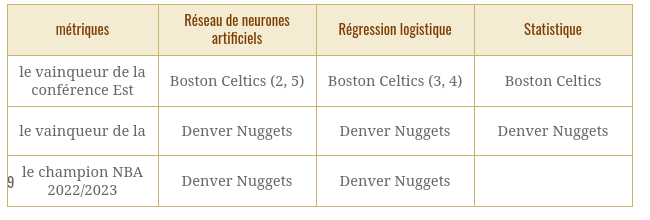






In [62]:


game_result_pridected = {}
for game in games_western_coded:
  count_vecroty_LosAngelesLakers_visitor = len(df[ 
        ( (df['result'] == True) & (df['Visitor/Neutral'] == games_western_coded[game][2]) & (df['day'] == games_western_coded[game][1]) & (df['day_name'] == games_western_coded[game][0]) )
  ])

  count_vecroty_DenverNuggets_home = len(df[ 
        ( (df['result'] == False) & (df['Home/Neutral'] == games_western_coded[game][3]) & (df['day'] == games_western_coded[game][1]) & (df['day_name'] == games_western_coded[game][0]) )
  ])
  if count_vecroty_LosAngelesLakers_visitor != count_vecroty_DenverNuggets_home:
    game_result_pridected[game] = {
            'count_vecroty_'+games_western[game][2].replace(' ','')+'_visitor' : count_vecroty_LosAngelesLakers_visitor,
            'count_vecroty_'+games_western[game][3].replace(' ','')+'_home' : count_vecroty_DenverNuggets_home,
            'result' : games_western[game][2] if count_vecroty_LosAngelesLakers_visitor > count_vecroty_DenverNuggets_home else games_western[game][3],
            'cond' :  ('result', 'day', 'day_name'),
      }
  else :  
    # game_result_pridected[game] = None,count_vecroty_LosAngelesLakers_visitor

    count_vecroty_LosAngelesLakers_visitor = len(df[ 
        ( (df['result'] == True) & (df['Visitor/Neutral'] == games_western_coded[game][2]) & (df['day'] == games_western_coded[game][1])  )
    ])

    count_vecroty_DenverNuggets_home = len(df[ 
          ( (df['result'] == False) & (df['Home/Neutral'] == games_western_coded[game][3]) & (df['day'] == games_western_coded[game][1]) )
    ])

    if count_vecroty_LosAngelesLakers_visitor != count_vecroty_DenverNuggets_home:
      game_result_pridected[game] = {
            'count_vecroty_'+games_western[game][2].replace(' ','')+'_visitor' : count_vecroty_LosAngelesLakers_visitor,
            'count_vecroty_'+games_western[game][3].replace(' ','')+'_home' : count_vecroty_DenverNuggets_home,
            'result' : games_western[game][2] if count_vecroty_LosAngelesLakers_visitor > count_vecroty_DenverNuggets_home else games_western[game][3],
            'cond' : ('result', 'day'),
      }
    else:
      count_vecroty_LosAngelesLakers_visitor = len(df[ 
        ( (df['result'] == True) & (df['Visitor/Neutral'] == games_western_coded[game][2]) & (df['day_name'] == games_western_coded[game][0])  )
      ])

      count_vecroty_DenverNuggets_home = len(df[ 
            ( (df['result'] == False) & (df['Home/Neutral'] == games_western_coded[game][3]) & (df['day_name'] == games_western_coded[game][0]) )
      ])
      if count_vecroty_LosAngelesLakers_visitor != count_vecroty_DenverNuggets_home:
        game_result_pridected[game] = {
            'count_vecroty_'+games_western[game][2].replace(' ','')+'_visitor' : count_vecroty_LosAngelesLakers_visitor,
            'count_vecroty_'+games_western[game][3].replace(' ','')+'_home' : count_vecroty_DenverNuggets_home,
            'result' : games_western[game][2] if count_vecroty_LosAngelesLakers_visitor > count_vecroty_DenverNuggets_home else games_western[game][3],
            'cond' :  ('result', 'day_name'),
        }
  
      else:

        count_vecroty_LosAngelesLakers_visitor = len(df[ 
          ( (df['result'] == True) & (df['Visitor/Neutral'] == games_western_coded[game][2]))
        ])

        count_vecroty_DenverNuggets_home = len(df[ 
              ( (df['result'] == False) & (df['Home/Neutral'] == games_western_coded[game][3]))
        ])

        if count_vecroty_LosAngelesLakers_visitor != count_vecroty_DenverNuggets_home:
          game_result_pridected[game] = {
            'count_vecroty_'+games_western[game][2].replace(' ','')+'_visitor' : count_vecroty_LosAngelesLakers_visitor,
            'count_vecroty_'+games_western[game][3].replace(' ','')+'_home' : count_vecroty_DenverNuggets_home,
            'result' : games_western[game][2] if count_vecroty_LosAngelesLakers_visitor > count_vecroty_DenverNuggets_home else games_western[game][3],
            'cond' :  ('result'),
        }
        else:
          game_result_pridected[game] = None,count_vecroty_LosAngelesLakers_visitor


In [63]:
game_result_pridected

{'Game 1': {'count_vecroty_LosAngelesLakers_visitor': 0,
  'count_vecroty_DenverNuggets_home': 1,
  'result': 'Denver Nuggets',
  'cond': ('result', 'day', 'day_name')},
 'Game 2': {'count_vecroty_LosAngelesLakers_visitor': 0,
  'count_vecroty_DenverNuggets_home': 1,
  'result': 'Denver Nuggets',
  'cond': ('result', 'day', 'day_name')},
 'Game 3': {'count_vecroty_DenverNuggets_visitor': 0,
  'count_vecroty_LosAngelesLakers_home': 1,
  'result': 'Los Angeles Lakers',
  'cond': ('result', 'day', 'day_name')},
 'Game 4': {'count_vecroty_DenverNuggets_visitor': 0,
  'count_vecroty_LosAngelesLakers_home': 1,
  'result': 'Los Angeles Lakers',
  'cond': ('result', 'day', 'day_name')},
 'Game 5': {'count_vecroty_LosAngelesLakers_visitor': 0,
  'count_vecroty_DenverNuggets_home': 1,
  'result': 'Denver Nuggets',
  'cond': ('result', 'day', 'day_name')},
 'Game 6': {'count_vecroty_DenverNuggets_visitor': 0,
  'count_vecroty_LosAngelesLakers_home': 1,
  'result': 'Los Angeles Lakers',
  'cond': 

In [64]:
vectory_game_count_DenverNuggets = len([game_result_pridected[key]['result'] for key in game_result_pridected  if game_result_pridected[key]['result']=='Denver Nuggets'])
vectory_game_count_LosAngelesLakers = len([game_result_pridected[key]['result'] for key in game_result_pridected  if game_result_pridected[key]['result']=='Los Angeles Lakers'])

vectory_game_count_DenverNuggets, vectory_game_count_LosAngelesLakers

(4, 3)